In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("salaries_by_college_major.csv")

In [3]:
df.shape

(51, 6)

In [4]:
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000
mean,44310.000000,74786.00000,43408.000000,142766.000000
std,9360.866217,16088.40386,12000.779567,27851.249267
min,34000.000000,52000.00000,26700.000000,96400.000000
25%,37050.000000,60825.00000,34825.000000,124250.000000
50%,40850.000000,72000.00000,39400.000000,145500.000000
75%,49875.000000,88750.00000,49850.000000,161750.000000
max,74300.000000,107000.00000,71900.000000,210000.000000


In [29]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Undergraduate Major                51 non-null     object 
 1   Starting Median Salary             50 non-null     float64
 2   Mid-Career Median Salary           50 non-null     float64
 3   Mid-Career 10th Percentile Salary  50 non-null     float64
 4   Mid-Career 90th Percentile Salary  50 non-null     float64
 5   Group                              50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


In [48]:
df.isnull().sum()

,0
Undergraduate Major,0
Starting Median Salary,1
Mid-Career Median Salary,1
Mid-Career 10th Percentile Salary,1
Mid-Career 90th Percentile Salary,1
Group,1


In [51]:
df[df["Group"].isnull()]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


In [56]:
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Undergraduate Major                50 non-null     object 
 1   Starting Median Salary             50 non-null     float64
 2   Mid-Career Median Salary           50 non-null     float64
 3   Mid-Career 10th Percentile Salary  50 non-null     float64
 4   Mid-Career 90th Percentile Salary  50 non-null     float64
 5   Group                              50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


In [61]:
df['Starting Median Salary'].max()

74300.0

In [62]:
df['Starting Median Salary'].idxmax()

43

In [64]:
df.loc[43]

,43
Undergraduate Major,Physician Assistant
Starting Median Salary,74300.0
Mid-Career Median Salary,91700.0
Mid-Career 10th Percentile Salary,66400.0
Mid-Career 90th Percentile Salary,124000.0
Group,STEM


In [73]:
df.loc[df["Mid-Career Median Salary"].idxmin()]

,18
Undergraduate Major,Education
Starting Median Salary,34900.0
Mid-Career Median Salary,52000.0
Mid-Career 10th Percentile Salary,29300.0
Mid-Career 90th Percentile Salary,102000.0
Group,HASS


In [87]:
spread_col = abs(df['Mid-Career 10th Percentile Salary'] - df['Mid-Career 90th Percentile Salary'])
df.insert(1, 'Spread', spread_col)


In [92]:
df.sort_values('Spread',ascending=False).head(5)

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
17,Economics,159400.0,50100.0,98600.0,50600.0,210000.0,Business
22,Finance,147800.0,47900.0,88300.0,47200.0,195000.0,Business
37,Math,137800.0,45400.0,92400.0,45200.0,183000.0,STEM
36,Marketing,132900.0,40800.0,79600.0,42100.0,175000.0,Business
42,Philosophy,132500.0,39900.0,81200.0,35500.0,168000.0,HASS


In [93]:
df.sort_values('Mid-Career 90th Percentile Salary',ascending=False).head(5)

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
17,Economics,159400.0,50100.0,98600.0,50600.0,210000.0,Business
22,Finance,147800.0,47900.0,88300.0,47200.0,195000.0,Business
8,Chemical Engineering,122100.0,63200.0,107000.0,71900.0,194000.0,STEM
37,Math,137800.0,45400.0,92400.0,45200.0,183000.0,STEM
44,Physics,122000.0,50300.0,97300.0,56000.0,178000.0,STEM


In [97]:
df.groupby('Group').count()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,,
Business,12,12,12,12,12,12
HASS,22,22,22,22,22,22
STEM,16,16,16,16,16,16


In [68]:
df.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 90th Percentile Salary', 'Group'],
      dtype='object')

<Axes: ylabel='Undergraduate Major'>

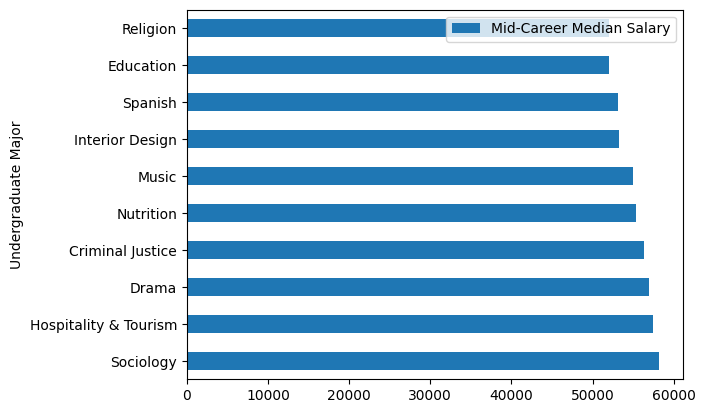

In [82]:
df[["Undergraduate Major", "Mid-Career Median Salary"]].sort_values(["Mid-Career Median Salary"],ascending=False).tail(10).plot(kind="barh", x="Undergraduate Major")

<Axes: xlabel='Mid-Career Median Salary', ylabel='Group'>

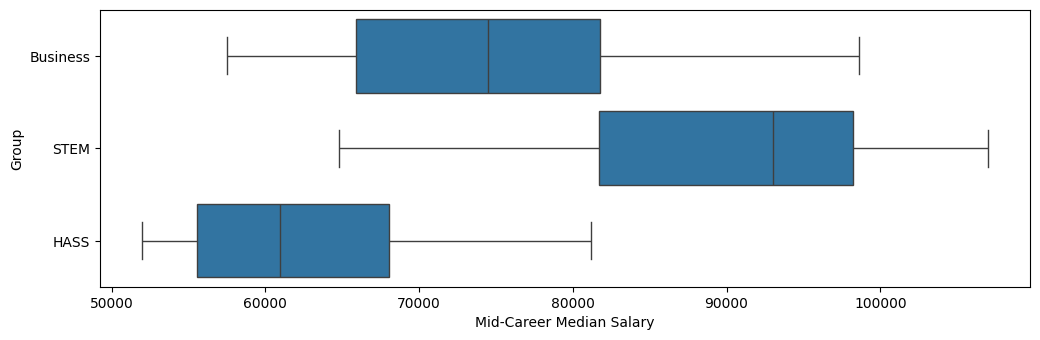

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Group'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(df, x='Mid-Career Median Salary', y='Group')